In [1]:
import numpy as np
import polars as pl

from matplotlib import pyplot as plt

In [2]:
import summary_stats_zero as ssz

In [3]:
rlzs = ssz.RealisationArray("./zero_ss_new_sims", "zero_delay")

In [4]:
rlzs.metadata

row_nr,seed,simdate,simtime
u32,i64,i64,i64
0,296,240613,65310
1,189,240613,72236
2,194,240613,74616
3,54,240613,60840
4,268,240613,80411
5,251,240613,62846
6,300,240613,81300
7,6,240613,63842
8,324,240613,73335


In [5]:
hittings = rlzs.collect('hitting_time')

In [7]:
hittings[0].shape

(338,)

In [11]:
seed_order = rlzs.metadata.select('seed').to_series().to_numpy()

hit_df = pl.from_numpy(np.hstack([np.vstack(hittings), seed_order[:,np.newaxis]]), schema=[*(f'hosp_{i}' for i in range(len(hittings[0]))), 'seed']).fill_nan(None)

hit_arr = hit_df.group_by('seed').mean().sort('seed').drop('seed').to_numpy()


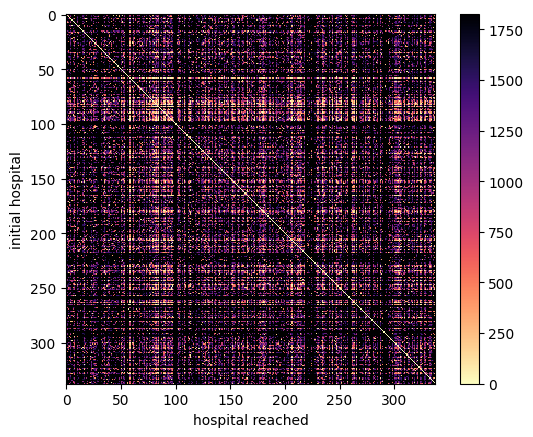

In [19]:
plt.imshow(hit_arr, cmap='magma_r', interpolation='nearest', vmin=0, vmax=5*365)

plt.colorbar()
plt.gca().set_facecolor('black')
plt.xlabel('hospital reached')
plt.ylabel('initial hospital')
plt.savefig("zero_ss_new_sims/analysis/mean_hitting_colorbar_caps_at_5.png", dpi=360)

In [23]:
np.linalg.eig(hit_arr)

LinAlgError: Array must not contain infs or NaNs

In [26]:
hit_arr[0,:]

hit_arr[:,0]

array([   0.        , 1208.        ,           nan,           nan,
       1469.83333333,           nan, 1952.5       , 2777.        ,
       1245.        ,           nan,  397.        ,           nan,
                 nan,           nan,           nan,  482.        ,
       1689.9       ,           nan, 1923.        ,           nan,
                 nan,           nan, 1219.        , 1361.        ,
       2579.        , 1149.25      ,           nan, 1748.        ,
       1457.        ,  368.        ,           nan,           nan,
                 nan,           nan, 1052.        , 1565.14285714,
                 nan,           nan, 1169.33333333, 1991.5       ,
                 nan, 2907.        ,           nan, 1702.        ,
        705.        , 2678.        ,           nan,           nan,
                 nan,           nan,  601.        , 1254.        ,
       1502.        , 2260.        ,           nan,           nan,
                 nan,           nan,  898.15384615, 2396.85714